In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/audiology.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '500M')

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['history_noise','class'],['history_fluctuating','class']]
tempForbid = p.ForbiddenWithin(
    ['class','history_fluctuating','history_noise'])
temporal = [tempForbid]
prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  class history_fluctuating history_noise

forbiddirect

requiredirect

#### Load causal algorithms from the py-causal library and Run Bootstrapping RFCI Discrete

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'rfci', testId = 'bdeu')

samplePrior: Sample prior (min = 1.0) (java.lang.Double) [default:1.0]
structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
depth: Maximum size of conditioning set (unlimited = -1) (java.lang.Integer) [default:-1]
maxPathLength: The maximum length for any discriminating path. -1 if unlimited (min = -1) (java.lang.Integer) [default:-1]
completeRuleSetUsed: Yes if the complete FCI rule set should be used (java.lang.Boolean) [default:false]
numberResampling: The number of bootstraps/resampling iterations (min = 0) (java.lang.Integer) [default:0]
percentResampleSize: The percentage of resample size (min = 0.1) (java.lang.Integer) [default:100]
resamplingWithReplacement: Yes, if sampling with replacement (bootstrapping) (java.lang.Boolean) [default:true]
resamplingEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
addOriginalDataset: Yes, if adding an original dataset as another bootstrapping (java.lang.Boo

In [6]:
tetrad.run(algoId = 'rfci', dfs = df, testId = 'bdeu', priorKnowledge = prior, dataType = 'discrete',
           structurePrior = 1.0, samplePrior = 1.0, depth = 3, maxPathLength = -1, 
           completeRuleSetUsed = True, verbose = True,
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

#### Bootstrapping RFCI Discrete's Result's Nodes

In [7]:
tetrad.getNodes()

['age_gt_60',
 'air',
 'airBoneGap',
 'ar_c',
 'ar_u',
 'bone',
 'boneAbnormal',
 'bser',
 'class',
 'history_buzzing',
 'history_dizziness',
 'history_fluctuating',
 'history_fullness',
 'history_heredity',
 'history_nausea',
 'history_noise',
 'history_recruitment',
 'history_ringing',
 'history_roaring',
 'history_vomiting',
 'indentifier',
 'late_wave_poor',
 'm_at_2k',
 'm_cond_lt_1k',
 'm_gt_1k',
 'm_m_gt_2k',
 'm_m_sn',
 'm_m_sn_gt_1k',
 'm_m_sn_gt_2k',
 'm_m_sn_gt_500',
 'm_p_sn_gt_2k',
 'm_s_gt_500',
 'm_s_sn',
 'm_s_sn_gt_1k',
 'm_s_sn_gt_2k',
 'm_s_sn_gt_3k',
 'm_s_sn_gt_4k',
 'm_sn_2_3k',
 'm_sn_gt_1k',
 'm_sn_gt_2k',
 'm_sn_gt_3k',
 'm_sn_gt_4k',
 'm_sn_gt_500',
 'm_sn_gt_6k',
 'm_sn_lt_1k',
 'm_sn_lt_2k',
 'm_sn_lt_3k',
 'middle_wave_poor',
 'mod_gt_4k',
 'mod_mixed',
 'mod_s_mixed',
 'mod_s_sn_gt_500',
 'mod_sn',
 'mod_sn_gt_1k',
 'mod_sn_gt_2k',
 'mod_sn_gt_3k',
 'mod_sn_gt_4k',
 'mod_sn_gt_500',
 'notch_4k',
 'notch_at_4k',
 'o_ar_c',
 'o_ar_u',
 's_sn_gt_1k',
 's_sn_g

#### Bootstrapping RFCI Discrete's Result's Edges

In [8]:
tetrad.getEdges()

['history_fluctuating o-o m_sn_lt_1k [history_fluctuating o-o m_sn_lt_1k]:0.6667;[history_fluctuating <-o m_sn_lt_1k]:0.1667;[no edge]:0.1667;',
 'bser o-o late_wave_poor [bser o-o late_wave_poor]:0.8333;[bser <-o late_wave_poor]:0.1667;',
 'ar_c o-o ar_u [ar_c o-o ar_u]:0.5000;[no edge]:0.5000;',
 'm_m_sn_gt_2k o-o notch_4k [m_m_sn_gt_2k o-o notch_4k]:0.5000;[m_m_sn_gt_2k o-> notch_4k]:0.1667;[no edge]:0.3333;',
 'bone o-> indentifier [bone o-> indentifier]:0.8333;[no edge]:0.1667;',
 'history_vomiting o-o m_sn_gt_4k [history_vomiting o-o m_sn_gt_4k]:0.5000;[no edge]:0.5000;',
 'airBoneGap o-o tymp [airBoneGap o-o tymp]:0.5000;[no edge]:0.5000;',
 'history_heredity o-o s_sn_gt_2k [history_heredity o-o s_sn_gt_2k]:0.6667;[no edge]:0.3333;',
 'static_normal o-o waveform_ItoV_prolonged [static_normal o-o waveform_ItoV_prolonged]:0.5000;[no edge]:0.5000;',
 'boneAbnormal o-> indentifier [boneAbnormal o-> indentifier]:0.8333;[no edge]:0.1667;',
 'class o-> indentifier [class o-> indentifie

#### Plot The Result's Graph

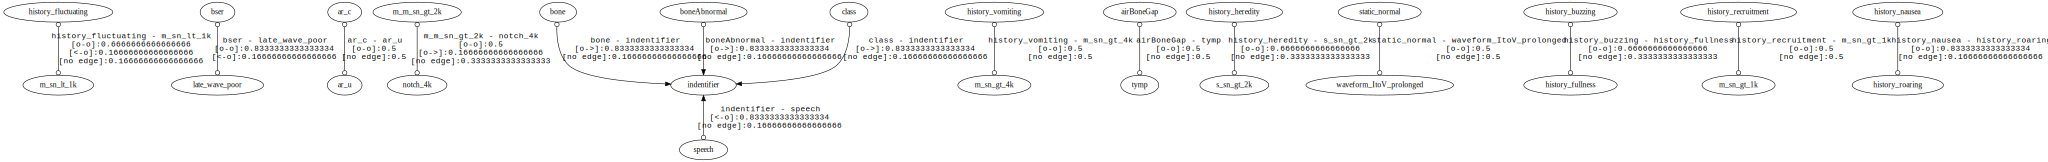

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()